<a href="https://colab.research.google.com/github/nishant-harinkhede12/Advanced-M-L-projects/blob/main/lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ghouls_train = 'https://raw.githubusercontent.com/nishant-harinkhede12/Advanced-M-L-projects/main/ghouls_train.csv'
ghouls_test = 'https://raw.githubusercontent.com/nishant-harinkhede12/Advanced-M-L-projects/main/ghouls_test.csv'

import numpy as np # linear algebra
import pandas as pd # data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

train_data = pd.read_csv(ghouls_train)
test_data = pd.read_csv(ghouls_test)

In [2]:
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [4]:
train_data['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [5]:
train_data['color'].value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

In [6]:
train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

train_data = train_data.set_index('id')

In [7]:
train_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,1,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,2,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,1,0,0,0,0,0
4,0.776652,0.508723,0.636766,0.884464,1,1,0,0,0,0,0
5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,0,1,0


In [8]:
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:

param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

lgbm = LGBMClassifier() # Shortname the LGBMClassifier()
lgbm.fit(X_train, y_train) # Train the lgbm on train sets

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [10]:
lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=40, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train)

y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

0.631


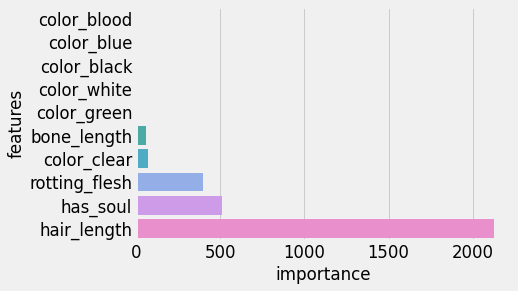

In [11]:
sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))